### This Script Creates the UI for the Data

In [1]:
import pandas as pd
import pickle
import numpy as np
craigslist_options=pd.read_pickle("craigslist_df.quinn")
craigslist_options


,posted,neighborhood,post title,number bedrooms,sqft,URL,price,Latitude,Longitude,Picture Link,Year1,Year3,Year5,Year10,Year20
0,2020-05-05 06:58,Corona Heights,Fabulous 2 unit in Upper Castro,8,3832.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,3264000,37.763265,-122.442534,https://images.craigslist.org/01717_hDr1DmN7iw...,3.432108e+06,4.242803e+06,6.854059e+06,9.651579e+06,1.445520e+07
1,2020-05-04 12:04,Mission,Well maintained office building for sale!,NaN,30000.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,13500000,37.764057,-122.418680,https://images.craigslist.org/00B0B_agTyaKYbYk...,1.359885e+07,1.744229e+07,2.835320e+07,4.294625e+07,6.430575e+07
2,2020-05-03 21:36,Mission,5 Unit Inner Mission Multifamily Property,NaN,NaN,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,2295000,37.751145,-122.409914,https://images.craigslist.org/00k0k_hszSJut6cB...,2.311805e+06,2.965189e+06,4.820045e+06,7.300862e+06,1.093198e+07
3,2020-05-03 21:35,Mission,5 Unit Inner Mission Multifamily Property,NaN,NaN,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,2295000,37.751145,-122.409914,https://images.craigslist.org/00k0k_hszSJut6cB...,2.311805e+06,2.965189e+06,4.820045e+06,7.300862e+06,1.093198e+07
4,2020-04-28 18:24,Lower Pacific Heights,LOW PAC HEIGHTS,3,NaN,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,1999950,37.785600,-122.435800,https://images.craigslist.org/00S0S_cJFi2yRoU9...,2.031397e+06,2.635201e+06,3.961258e+06,5.567475e+06,8.058637e+06
5,2020-04-28 18:24,Lower Pacific Heights,LOW PAC HEIGHTS sun 1-5,3,NaN,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,1999950,37.785600,-122.435800,https://images.craigslist.org/00z0z_jEQ6q7Qzrj...,2.031397e+06,2.635201e+06,3.961258e+06,5.567475e+06,8.058637e+06
6,2020-05-05 11:47,Lower Pacific Heights,Development Opportunity,NaN,NaN,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,2550000,37.785613,-122.444515,https://images.craigslist.org/00909_kvIH7Kesp1...,2.590096e+06,3.359965e+06,5.050730e+06,7.098708e+06,1.027502e+07
7,2020-05-04 14:42,South of Market,3D TOUR LIVE corner condo at The Beacon birds ...,2,1230.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,1295000,37.777134,-122.394530,https://images.craigslist.org/00T0T_4UcgJNig7M...,1.333323e+06,1.760053e+06,2.702165e+06,3.707825e+06,4.949665e+06
8,2020-05-04 14:41,South of Market,3D TOUR - Stylish corner 2Br at The Beacon wit...,2,1286.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,1348888,37.777151,-122.393982,https://images.craigslist.org/00v0v_d8EWat6XrW...,1.388805e+06,1.833293e+06,2.814608e+06,3.862116e+06,5.155632e+06
9,2020-05-04 14:43,South of Market,3D TOUR! Beautiful waterfront oasis on Mission...,2,1300.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,1499800,37.776414,-122.393146,https://images.craigslist.org/00P0P_JbHaDCzvZl...,1.544183e+06,2.038400e+06,3.129503e+06,4.294205e+06,5.732438e+06


In [2]:
def decimalyear(stringdate):
    import datetime as dt
    from PyAstronomy import pyasl
    year=int(stringdate[0:4])
    month=int(stringdate[5:7])
    day=int(stringdate[8:10])
    hour=int(stringdate[11:13])
    minute=int(stringdate[14:])
    d=dt.datetime(year,month,day,hour,minute)
    dyear=pyasl.decimalYear(d)  
    return dyear

def datefromdec(dyear):
    from PyAstronomy import pyasl
    return pyasl.decimalYearGregorianDate(dyear,"yyyy-mm-dd hh:mm")

def fiveyears():
    import datetime as dt
    td=dt.date.today()
    tdtuple=td.timetuple()
    yr=tdtuple[0]+5
    fytuple=(yr,tdtuple[1],tdtuple[2])
    fy=dt.datetime(yr,tdtuple[1],tdtuple[2])
    return fy

def today_():
    import datetime as dt
    td=dt.date.today()
    tdtuple=td.timetuple()
    return td

In [3]:
lat= craigslist_options['Latitude'].astype(str)
long=craigslist_options['Longitude'].astype(str)
coordinates=lat.str.cat(long,sep=', ')

In [4]:
for j in range(0,1000):
    try:
        from geopy.geocoders import Nominatim
        geolocator = Nominatim(user_agent="ModelApplications")
        from geopy.extra.rate_limiter import RateLimiter
        geocode = RateLimiter(geolocator.reverse, min_delay_seconds=3)
        location=[]
        for i in coordinates:
            location.append(geolocator.reverse(i,exactly_one=True))
        break
    except:
        continue


#location = coordinates.apply(geocode)
#reverse(query, exactly_one=True, timeout=DEFAULT_SENTINEL, language=False, addressdetails=True)

In [5]:
addressList = []
for i in location:
    addressArray=i.address.split(',')
    if not addressArray[0][0].isnumeric():
        addressArray.pop(0)
    addressList.append(','.join(addressArray[0:4]))
craigslist_options['Address']=addressList


In [6]:
craigslist_options=craigslist_options.drop_duplicates(subset ="Address") 
craigslist_options=craigslist_options.reset_index(drop=True)


In [7]:
import numpy as np
import datetime as dt
hoods=pd.unique(craigslist_options['neighborhood'])
thoods=[]
for i in hoods:
    thoods.append((i,i))

minprice=craigslist_options['price'].min()
maxprice=craigslist_options['price'].max()
priceoptions=np.linspace(maxprice,minprice,5,endpoint=False,dtype=int)
tpriceoptions=[]
for i in priceoptions:
    tpriceoptions.append((str(i),str(i)))


td=dt.date.today()
tdtuple=td.timetuple()
yrs=[tdtuple[0]+1,tdtuple[0]+3,tdtuple[0]+5,tdtuple[0]+10,tdtuple[0]+20]
dates=pd.DataFrame([td,dt.datetime(yrs[0],tdtuple[1],tdtuple[2]),dt.datetime(yrs[1],tdtuple[1],tdtuple[2]),dt.datetime(yrs[2],tdtuple[1],tdtuple[2]),dt.datetime(yrs[3],tdtuple[1],tdtuple[2]),dt.datetime(yrs[4],tdtuple[1],tdtuple[2])])
tpriceoptions

[('13500000', '13500000'),
 ('10939999', '10939999'),
 ('8379999', '8379999'),
 ('5819999', '5819999'),
 ('3259999', '3259999')]

In [8]:
craigslist_options

,posted,neighborhood,post title,number bedrooms,sqft,URL,price,Latitude,Longitude,Picture Link,Year1,Year3,Year5,Year10,Year20,Address
0,2020-05-05 06:58,Corona Heights,Fabulous 2 unit in Upper Castro,8,3832.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,3264000,37.763265,-122.442534,https://images.craigslist.org/01717_hDr1DmN7iw...,3.432108e+06,4.242803e+06,6.854059e+06,9.651579e+06,1.445520e+07,"145, Lower Terrace, Cole Valley, San Francisco"
1,2020-05-04 12:04,Mission,Well maintained office building for sale!,NaN,30000.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,13500000,37.764057,-122.418680,https://images.craigslist.org/00B0B_agTyaKYbYk...,1.359885e+07,1.744229e+07,2.835320e+07,4.294625e+07,6.430575e+07,"160, Capp Street, Mission District, San Franc..."
2,2020-05-03 21:36,Mission,5 Unit Inner Mission Multifamily Property,NaN,NaN,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,2295000,37.751145,-122.409914,https://images.craigslist.org/00k0k_hszSJut6cB...,2.311805e+06,2.965189e+06,4.820045e+06,7.300862e+06,1.093198e+07,"2950, 25th Street, Mission District, San Fran..."
3,2020-04-28 18:24,Lower Pacific Heights,LOW PAC HEIGHTS,3,NaN,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,1999950,37.785600,-122.435800,https://images.craigslist.org/00S0S_cJFi2yRoU9...,2.031397e+06,2.635201e+06,3.961258e+06,5.567475e+06,8.058637e+06,"2135, Sutter Street, Western Addition, San Fr..."
4,2020-05-05 11:47,Lower Pacific Heights,Development Opportunity,NaN,NaN,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,2550000,37.785613,-122.444515,https://images.craigslist.org/00909_kvIH7Kesp1...,2.590096e+06,3.359965e+06,5.050730e+06,7.098708e+06,1.027502e+07,"2873, Bush Street, Western Addition, San Franc..."
5,2020-05-04 14:42,South of Market,3D TOUR LIVE corner condo at The Beacon birds ...,2,1230.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,1295000,37.777134,-122.394530,https://images.craigslist.org/00T0T_4UcgJNig7M...,1.333323e+06,1.760053e+06,2.702165e+06,3.707825e+06,4.949665e+06,"260, King Street, South Beach, San Francisco"
6,2020-05-04 15:03,South of Market,3D Tour Live! Stylish renovated Beacon condo w...,2,1142.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,1318000,37.777211,-122.392960,https://images.craigslist.org/00202_49SmsbZNAz...,1.357003e+06,1.791313e+06,2.750157e+06,3.773678e+06,5.037574e+06,"270, King Street, South Beach, San Francisco"
7,2020-05-04 14:42,Financial District,3D TOUR LIVE - Off Market GG Bridge & Transame...,2,1798.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,2188000,37.790878,-122.403093,https://images.craigslist.org/00m0m_4PfgPsu9Wh...,1.837022e+06,2.108568e+06,2.792157e+06,4.189817e+06,4.850634e+06,"333 Bush, 333, Bush Street, Chinatown"
8,2020-05-04 14:42,South Beach,3D TOUR LIVE- Elegant waterfront condo w balco...,2,1279.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,1428000,37.779996,-122.389487,https://images.craigslist.org/00x0x_4juNPdw0hT...,1.381793e+06,1.753336e+06,2.667387e+06,4.060315e+06,6.017340e+06,"South Beach, San Francisco, San Francisco Cit..."
9,2020-05-04 11:04,South Beach,"Top Floor Condo w/ 14’ ceilings, Remodeled w/ ...",1,855.0,https://sfbay.craigslist.org/sfc/reb/d/san-fra...,980000,37.785874,-122.394201,https://images.craigslist.org/00808_lMpUJVimeD...,9.482893e+05,1.203270e+06,1.830559e+06,2.786491e+06,4.129547e+06,"45, Lansing Street, South Beach, San Francisco"


In [9]:
from flask_wtf import FlaskForm
from wtforms import StringField, SubmitField, TextField, HiddenField, FieldList, FormField, SelectField, SelectMultipleField
from wtforms.validators import InputRequired, NoneOf

Neighborhoods = thoods
Prices = tpriceoptions
class PageManager():
    def __init__(self):
        #inits here
        self.defaultPrice = None
        self.defaultNeighborhood = None
        self.topPicks = None
    def init(self, dataframe=None):
        #get a list neighborhoods
        
        self.form = EntryForm()
        
    def update(self, request, dataframe=None):
        #update Form choices
        self.defaultPrice = request.form.getlist('MaxPriceDropdown')[0]
        self.form.MaxPriceDropdown.data = self.defaultPrice
        self.defaultNeighborhood = request.form.getlist('NeighborhoodsDropdown')
        self.form.NeighborhoodsDropdown.data = self.defaultNeighborhood
        
        print(self.defaultPrice)
        print(self.defaultNeighborhood)
        
        #filter dataframe given selections
        if self.defaultPrice is not None:
            filterprice=craigslist_options['price']<=int(self.defaultPrice)
            crfilter_df=craigslist_options[filterprice]
        else:
            crfilter_df=craigslist_options
        if len(self.defaultNeighborhood)>0:
            filterhoods=craigslist_options['neighborhood'].isin(self.defaultNeighborhood)
            crfilter_df2=crfilter_df[filterhoods]
        else:
            crfilter_df2=crfilter_df

        top_picks = crfilter_df2.sort_values(['Year20'], ascending=False,na_position='last').head()#filter soehow
        
        self.topPicks = top_picks

        
        

class EntryForm(FlaskForm):
    MaxPriceDropdown = SelectField("Pick Price", choices = Prices, validators=[InputRequired()])
    NeighborhoodsDropdown = SelectMultipleField("Pick Location", choices = Neighborhoods, validators=[InputRequired()])

    





In [10]:
from flask import Flask, render_template, request, redirect
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table 
app = Flask(__name__)
app.config['SECRET_KEY'] = "SecretKey123"

pm = PageManager()
#outputCheck = None

@app.before_first_request
def initializeForm():
    global pm
    pm.init()
    
    
# prevent cached responses
@app.route('/',  methods=['GET','POST'])
def index():
    global pm
    form = pm.form
    return render_template('index.html', form=form)

@app.route('/Update',  methods=['GET','POST'])
def update():
    global pm
    
    pm.update(request)
      
    return redirect("/")

@app.route('/results',  methods=['GET','POST'])
def results():
    global pm, outputCheck
    outputCheck = pm.topPicks
    

    printframe=outputCheck.drop(['Latitude','Longitude','Picture Link','number bedrooms','sqft','URL','post title'],axis=1)
    printframe['Current Value']=printframe['price'].astype(int)
    printframe['Value in 1 Year']=printframe['Year1'].astype(int)
    printframe['Value in 3 Years']=printframe['Year3'].astype(int)
    printframe['Value in 5 Years']=printframe['Year5'].astype(int)
    printframe['Value in 10 Years']=printframe['Year10'].astype(int)
    printframe['Value in 20 Years']=printframe['Year20'].astype(int)
    printframe=printframe.drop(['price','Year1','Year3','Year5','Year10','Year20'],axis=1)
    printframe['Address']=outputCheck['Address']
    printframe.index=np.arange(0,len(printframe['Address']))

    fuprices=printframe.drop(['posted','neighborhood'],axis=1)
    fupricezz=fuprices.T
    fupricezz.columns = fupricezz.iloc[0]
    fupricezz = fupricezz.drop(fupricezz.index[0])
    fupricezz = fupricezz.reset_index(drop=True)
    
    fig, (ax2) = plt.subplots(1,1, figsize=(12,8))
    for i in fupricezz.columns:
            ax2.plot(dates,fupricezz.loc[:,i],label=i)
    ax2.legend(loc=2)    
    ax2.set(xlabel='Time (years)',ylabel='Value (dollars)')
    ax2.set_title('Future Home Value')
    fig.savefig('./static/plot.jpeg')
    plotimg = './static/plot.jpeg'
    current=printframe.loc[0,'Current Value']
    ROI5=printframe.loc[0,'Value in 5 Years']-int(printframe.loc[0,'Current Value'])
    ROI10=printframe.loc[0,'Value in 10 Years']-int(printframe.loc[0,'Current Value'])
    ROI20=printframe.loc[0,'Value in 20 Years']-int(printframe.loc[0,'Current Value'])
    Address1=printframe.loc[0,'Address']
    message='Press [Ctrl]+[Shift]+[R] to clear the cache and display results!!'
    link=outputCheck.iloc[0,5]
    link2=outputCheck.iloc[1,5]
    link3=outputCheck.iloc[2,5]
    return render_template('results.html', outputCheck=outputCheck, message=message, link=link,link2=link2,link3=link3,current=current,ROI5=ROI5,ROI10=ROI10,ROI20=ROI20,Address1=Address1,img=plotimg)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/May/2020 18:32:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2020 18:32:18] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/May/2020 18:37:27] "POST /Update HTTP/1.1" 302 -
127.0.0.1 - - [05/May/2020 18:37:27] "GET / HTTP/1.1" 200 -


5819999
[]


C:\Users\qtodz\Anaconda3\envs\REALESTATEPROJECT\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
127.0.0.1 - - [05/May/2020 18:37:30] "POST /Update HTTP/1.1" 302 -
127.0.0.1 - - [05/May/2020 18:37:30] "GET / HTTP/1.1" 200 -


5819999
['South Beach']


127.0.0.1 - - [05/May/2020 18:37:33] "POST /Update HTTP/1.1" 302 -
127.0.0.1 - - [05/May/2020 18:37:33] "GET / HTTP/1.1" 200 -


5819999
['South Beach', 'Cow Hollow']


127.0.0.1 - - [05/May/2020 18:37:36] "POST /Update HTTP/1.1" 302 -
127.0.0.1 - - [05/May/2020 18:37:36] "GET / HTTP/1.1" 200 -


5819999
['South Beach', 'Cow Hollow', 'Visitacion Valley']


C:\Users\qtodz\Anaconda3\envs\REALESTATEPROJECT\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
127.0.0.1 - - [05/May/2020 18:37:39] "GET /results HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2020 18:37:45] "GET /results HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2020 18:37:45] "GET /static/plot.jpeg HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2020 18:37:45] "GET /static/css/results.css HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2020 18:37:45] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/May/2020 18:40:34] "GET /results HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2020 18:41:02] "GET /results HT

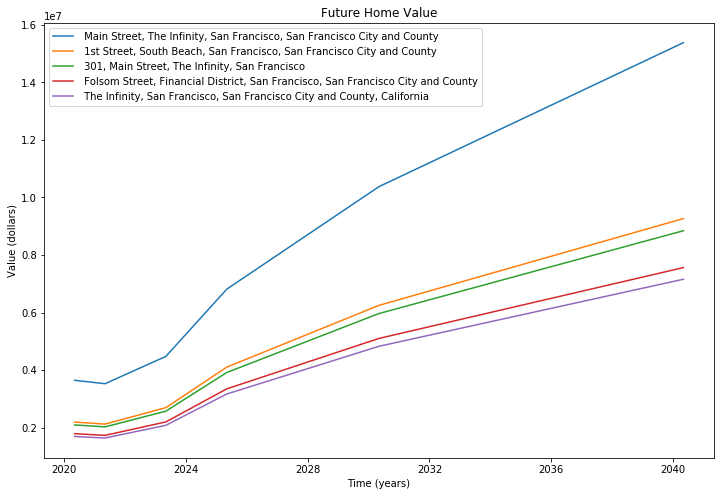

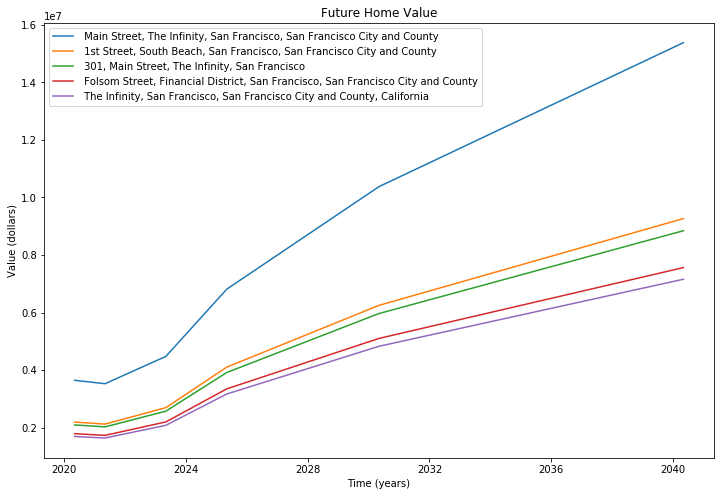

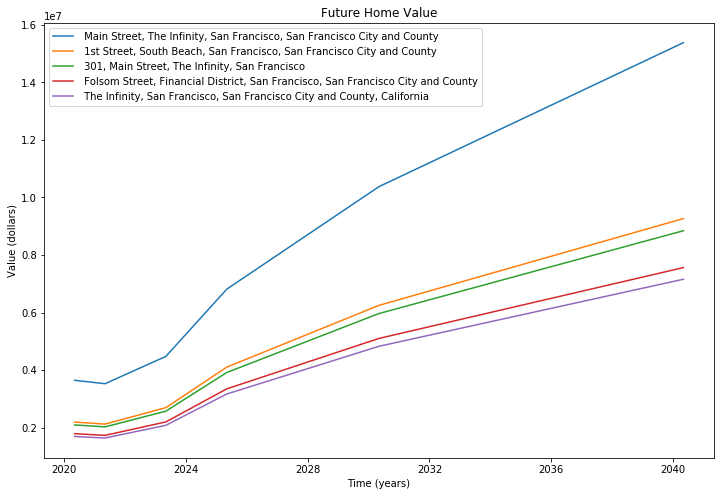

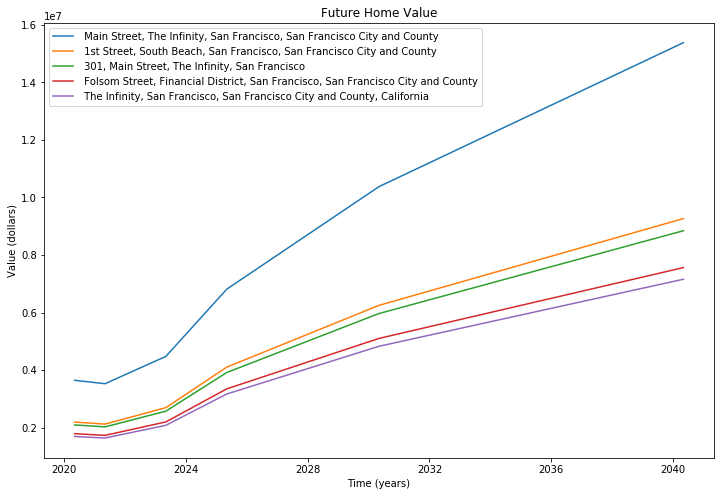

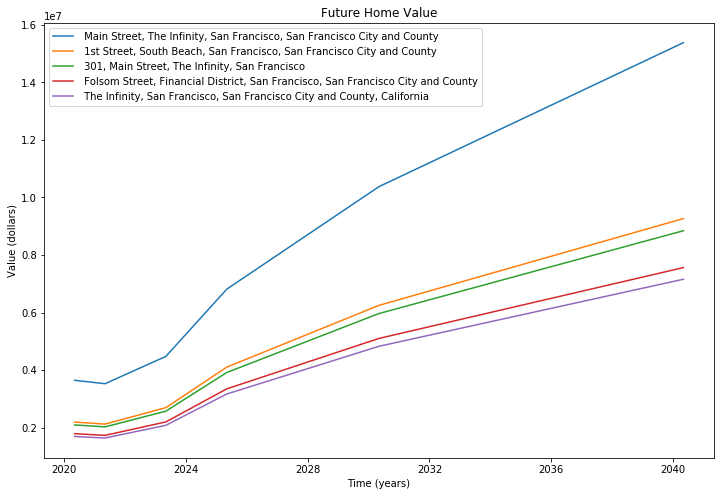

In [11]:
app.run()